### https://imgaug.readthedocs.io/en/latest/source/examples_bounding_boxes.html

# Dealing with bounding boxes outside of the image

When augmenting images and their respective bounding boxes, the boxes can end up fully or partially outside of the image plane. By default, the library still returns these boxes, even though that may not be desired. The following example shows how to (a) remove bounding boxes that are fully/partially outside of the image and (b) how to cut bounding boxes that are partially outside of the image so that their are fully inside.

In [2]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
ia.seed(1)

In [3]:
GREEN = [0, 255, 0]
ORANGE = [255, 140, 0]
RED = [255, 0, 0]

In [4]:
# Pad image with a 1px white and (BY-1)px black border
def pad(image, by):
    if by <= 0:
        return image
    image_border1 = np.pad(
        image, ((1, 1), (1, 1), (0, 0)),
        mode="constant", constant_values=255
    )
    image_border2 = np.pad(
        image_border1, ((by-1, by-1), (by-1, by-1), (0, 0)),
        mode="constant", constant_values=0
    )

    return image_border2

In [5]:
# Draw BBs on an image
# and before doing that, extend the image plane by BORDER pixels.
# Mark BBs inside the image plane with green color, those partially inside
# with orange and those fully outside with red.
def draw_bbs(image, bbs, border):
    image_border = pad(image, border)
    for bb in bbs.bounding_boxes:
        if bb.is_fully_within_image(image.shape):
            color = GREEN
        elif bb.is_partly_within_image(image.shape):
            color = ORANGE
        else:
            color = RED
        image_border = bb.shift(left=border, top=border)\
                         .draw_on_image(image_border, thickness=2, color=color)

    return image_border

In [6]:
# Define example image with three small square BBs next to each other.
# Augment these BBs by shifting them to the right.
image = ia.quokka(size=(256, 256))
bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=25, x2=75, y1=25, y2=75),
    ia.BoundingBox(x1=100, x2=150, y1=25, y2=75),
    ia.BoundingBox(x1=175, x2=225, y1=25, y2=75)
], shape=image.shape)

seq = iaa.Affine(translate_px={"x": 120})
seq_det = seq.to_deterministic()

image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

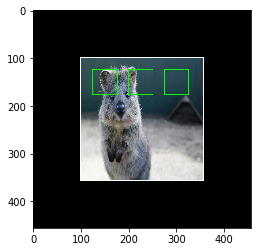

In [15]:
# Draw the BBs (a) in their original form, (b) after augmentation,
# (c) after augmentation and removing those fully outside the image,
# (d) after augmentation and removing those fully outside the image and
# cutting those partially inside the image so that they are fully inside.
image_before = draw_bbs(image, bbs, 100)
plt.imshow(image_before)

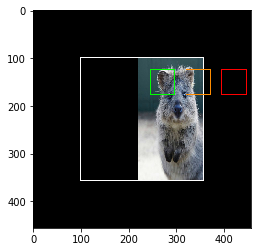

In [14]:
image_after1 = draw_bbs(image_aug, bbs_aug, 100)
plt.imshow(image_after1)

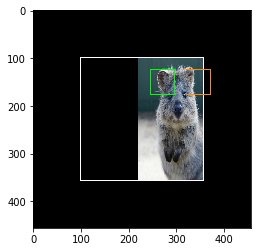

In [12]:
image_after2 = draw_bbs(image_aug, bbs_aug.remove_out_of_image(), 100)
plt.imshow(image_after2)

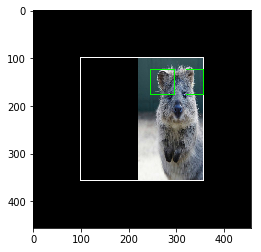

In [11]:
image_after3 = draw_bbs(image_aug, bbs_aug.remove_out_of_image().cut_out_of_image(), 100)
plt.imshow(image_after3)